In [32]:
import numpy as np
import pandas as pd
from pathlib import Path
# import feather
import matplotlib.pyplot as plt
%matplotlib inline

print(np.__version__)
print(pd.__version__)

ModuleNotFoundError: No module named 'feather'

In [2]:
!pwd
!ls -l
!ls -l DORA/

/mnt/c/Users/yunghui/Documents/DORA/ts2vec/datasets
total 184
drwxrwxrwx 1 yunghui yunghui    512 Dec  6 13:43 DORA
drwxrwxrwx 1 yunghui yunghui    512 Dec  6 13:52 UEA
-rwxrwxrwx 1 yunghui yunghui 174417 Dec  7 09:04 preprocess_DORA.ipynb
-rwxrwxrwx 1 yunghui yunghui    677 Dec  1 09:11 preprocess_electricity.py
-rwxrwxrwx 1 yunghui yunghui   3533 Dec  1 09:11 preprocess_kpi.py
-rwxrwxrwx 1 yunghui yunghui   3378 Dec  1 09:11 preprocess_yahoo.py
total 9268
-rwxrwxrwx 1 yunghui yunghui  323994 Dec  6 13:33 df_event_KA01AF2992.feather
-rwxrwxrwx 1 yunghui yunghui 1354946 Dec  6 13:33 df_event_KA01AF482.feather
-rwxrwxrwx 1 yunghui yunghui  557290 Dec  1 16:00 df_event_KA04MW6569.feather
-rwxrwxrwx 1 yunghui yunghui 2166618 Dec  1 16:00 df_event_KA51AG8742.feather
-rwxrwxrwx 1 yunghui yunghui  615970 Dec  6 13:33 df_event_MH04KF8187.feather
-rwxrwxrwx 1 yunghui yunghui  307386 Dec  5 16:23 df_event_agg_KA01AF2992.feather
-rwxrwxrwx 1 yunghui yunghui 1245690 Dec  5 16:23 df_event_agg_KA01

## Data Explore 

### Check out the data profiles

##### Load data after filter Fierce behavior event 

In [45]:
# Load files
dir_DORA = Path('DORA')
path_event_DORA = [path for path in list(dir_DORA.glob('*'))
             if path.suffix in ['.csv', '.feather'] 
             and 'all' not in path.name
             and 'agg' not in path.name
             ]
path_event_DORA

[PosixPath('DORA/df_event_KA01AF2992.feather'),
 PosixPath('DORA/df_event_KA01AF482.feather'),
 PosixPath('DORA/df_event_KA04MW6569.feather'),
 PosixPath('DORA/df_event_KA51AG8742.feather'),
 PosixPath('DORA/df_event_MH04KF8187.feather')]

In [27]:
# Load data after filter Fierce behavior event 
df_event = pd.concat([pd.read_feather(path_) for path_ in path_event_DORA]).reset_index(drop=True)
print(df_event.columns)
df_event.info()
df_event.head(3)

Index(['id', 'vehicle_id', 'latitude', 'longitude', 'speed', 'heading',
       'timestamp', 'gsen_timeTick', 'gyro_timeTick', 'gsen_X', 'gyro_X',
       'gsen_Y', 'gyro_Y', 'gsen_Z', 'gyro_Z', 'timestamp_conv', 'event_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20504 non-null  int64         
 1   vehicle_id      20504 non-null  object        
 2   latitude        20504 non-null  float64       
 3   longitude       20504 non-null  float64       
 4   speed           20504 non-null  float64       
 5   heading         20504 non-null  float64       
 6   timestamp       20504 non-null  int64         
 7   gsen_timeTick   20504 non-null  object        
 8   gyro_timeTick   20504 non-null  object        
 9   gsen_X          20504 non-null  object        
 10  gyro_X          

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,"[5458092, 5458294, 5458492, 5458692, 5458893]","[5458091, 5458294, 5458492, 5458692, 5458892]","[-0.1768442541360855, -0.3292020559310913, -0....","[0.0027008056640625, -0.009552001953125, -0.01...","[0.35891878604888916, 0.359760046005249, 0.359...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.024566650390625, 0.02606201171875, 0.024032...",2022-07-27 06:04:39.193,1
1,39079364,KA01AF2992,13.094095,77.594323,4.052998,184.984238,1658901880193,"[5459092, 5459293, 5459494, 5459693, 5459893]","[5459092, 5459292, 5459493, 5459693, 5459892]","[-0.3817916512489319, 0.030077725648880005, 0....","[-0.0150909423828125, 0.01611328125, 0.0014190...","[0.303417444229126, -0.0026443004608154297, 0....","[-0.0308685302734375, 0.019500732421875, 0.033...","[0.7125339508056641, -1.2284603118896484, -0.1...","[0.0198822021484375, 0.017852783203125, 0.0147...",2022-07-27 06:04:40.193,1
2,39079620,KA01AF2992,13.086250,77.593758,7.070510,185.000580,1658901973438,"[5549111, 5549312, 5549512, 5549712, 5549911]","[5549111, 5549312, 5549512, 5549712, 5549911]","[0.42737051844596863, 0.10562610626220703, -0....","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.038906097412109375, 0.31329238414764404, 0...","[-0.0077667236328125, -0.0175628662109375, -0....","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0094451904296875, 0.0131683349609375, 0.010...",2022-07-27 06:06:13.438,2


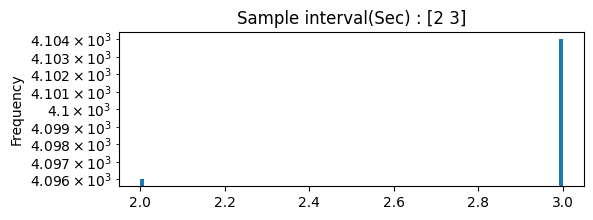

In [17]:
figsize =(6, 2)
df_event_sec = df_event.groupby(['vehicle_id', 'event_id']).id.count()
# df_event_sec.plot.hist(figsize=figsize, title='Sample interval : second');
s_interval = np.sort(df_event_sec.unique())
title=f'Sample interval(Sec) : {s_interval}'
df_event_sec.plot.hist(figsize=figsize, bins=100, title=title, logy=True);

print()

##### Load data after aggregate

In [46]:
# Load files
dir_DORA = Path('DORA')
path_event_agg_DORA = [path for path in list(dir_DORA.glob('*'))
             if path.suffix in ['.csv', '.feather'] 
             and 'agg' in path.name
             ]
path_event_agg_DORA

[PosixPath('DORA/df_event_agg_KA01AF2992.feather'),
 PosixPath('DORA/df_event_agg_KA01AF482.feather'),
 PosixPath('DORA/df_event_agg_KA04MW6569.feather'),
 PosixPath('DORA/df_event_agg_KA51AG8742.feather'),
 PosixPath('DORA/df_event_agg_MH04KF8187.feather')]

In [29]:
# Load data after aggregate
figsize=(6,2)
df_agg = pd.concat([pd.read_feather(path_) for path_ in path_event_agg_DORA]).reset_index(drop=True)
# print(df_agg.columns)
# df_agg.info()
df_agg.head(3)


,event_id,gsen_X,gsen_Y,gsen_Z,gyro_X,gyro_Y,gyro_Z,lat_std,long_std,speed_mean,...,gsen_Z_max,gsen_Z_min,gsen_Z_range,gyro_Z_mean,gyro_Z_std,gyro_Z_max,gyro_Z_min,gyro_Z_range,lat_mean,long_mean
0,1,"[-0.1768442541360855, -0.3292020559310913, -0....","[0.35891878604888916, 0.359760046005249, 0.359...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.0027008056640625, -0.009552001953125, -0.01...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.024566650390625, 0.02606201171875, 0.024032...",0.000020,0.000002,4.221517,...,5.481957,-2.476293,7.958250,0.020793,0.003755,0.026062,0.014755,0.011307,NaN,NaN
1,2,"[0.42737051844596863, 0.10562610626220703, -0....","[-0.038906097412109375, 0.31329238414764404, 0...","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.0077667236328125, -0.0175628662109375, -0....","[0.0094451904296875, 0.0131683349609375, 0.010...",0.000052,0.000005,7.078683,...,3.184722,-2.618477,5.803199,0.014061,0.003872,0.022751,0.009445,0.013306,NaN,NaN
2,3,"[0.09482461214065552, 0.15548771619796753, 0.2...","[0.024686694145202637, 0.18659746646881104, 0....","[-0.0026922225952148438, -0.14077472686767578,...","[0.01654052734375, -0.005401611328125, -0.0039...","[-0.0142669677734375, -0.0097808837890625, 0.0...","[0.00848388671875, 0.0093231201171875, 0.01338...",0.000042,0.000004,9.010814,...,3.178970,-2.633689,5.812659,0.017439,0.006221,0.030319,0.008484,0.021835,NaN,NaN


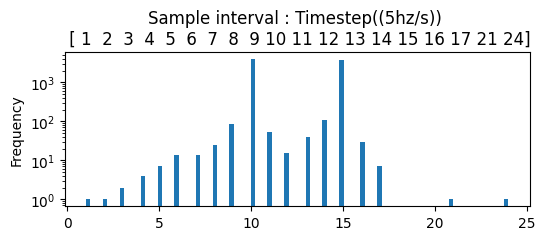

In [23]:
df_agg_timestep = df_agg.gsen_X.apply(lambda df_: len(df_))
s_interval = np.sort(df_agg_timestep.unique())
title=f'Sample interval : Timestep((5hz/s)) \n {s_interval}'
df_agg_timestep.plot.hist(figsize=figsize, bins=100, title=title, logy=True);

##### note
- timestep btw 8-17
    - maybe have enough information 
- is evenly distributed?
    - If the data sampling point is continuous, it will not affect the feature of the data itself.

### Check Missing datalog and timesteps

##### Load All event data

In [47]:
# Load files

file_ = 'df_event_all_v1'

# dir_DORA = Path('DORA')
# path_DORA = [path for path in list(dir_DORA.glob('*'))
#              if path.suffix in ['.csv', '.feather']  
#              and 'all' not in path.name
#              and 'agg' not in path.name
#              ]
# path_DORA
# df_event = pd.concat([pd.read_feather(path_) for path_ in path_DORA]).reset_index(drop=True)

# df_event.to_feather(dir_DORA/f'{file_}.feather')

In [48]:
df_event = pd.read_feather(dir_DORA/f'{file_}.feather')

print(df_event.columns)
df_event.info()
df_event.head()

Index(['id', 'vehicle_id', 'latitude', 'longitude', 'speed', 'heading',
       'timestamp', 'gsen_timeTick', 'gyro_timeTick', 'gsen_X', 'gyro_X',
       'gsen_Y', 'gyro_Y', 'gsen_Z', 'gyro_Z', 'timestamp_conv', 'event_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20504 entries, 0 to 20503
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20504 non-null  int64         
 1   vehicle_id      20504 non-null  object        
 2   latitude        20504 non-null  float64       
 3   longitude       20504 non-null  float64       
 4   speed           20504 non-null  float64       
 5   heading         20504 non-null  float64       
 6   timestamp       20504 non-null  int64         
 7   gsen_timeTick   20504 non-null  object        
 8   gyro_timeTick   20504 non-null  object        
 9   gsen_X          20504 non-null  object        
 10  gyro_X          

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
0,39079362,KA01AF2992,13.094135,77.594326,4.390037,185.001465,1658901879193,"[5458092, 5458294, 5458492, 5458692, 5458893]","[5458091, 5458294, 5458492, 5458692, 5458892]","[-0.1768442541360855, -0.3292020559310913, -0....","[0.0027008056640625, -0.009552001953125, -0.01...","[0.35891878604888916, 0.359760046005249, 0.359...","[-0.0084075927734375, -0.026397705078125, -0.0...","[0.4236612319946289, 0.5882062911987305, 0.645...","[0.024566650390625, 0.02606201171875, 0.024032...",2022-07-27 06:04:39.193,1
1,39079364,KA01AF2992,13.094095,77.594323,4.052998,184.984238,1658901880193,"[5459092, 5459293, 5459494, 5459693, 5459893]","[5459092, 5459292, 5459493, 5459693, 5459892]","[-0.3817916512489319, 0.030077725648880005, 0....","[-0.0150909423828125, 0.01611328125, 0.0014190...","[0.303417444229126, -0.0026443004608154297, 0....","[-0.0308685302734375, 0.019500732421875, 0.033...","[0.7125339508056641, -1.2284603118896484, -0.1...","[0.0198822021484375, 0.017852783203125, 0.0147...",2022-07-27 06:04:40.193,1
2,39079620,KA01AF2992,13.086250,77.593758,7.070510,185.000580,1658901973438,"[5549111, 5549312, 5549512, 5549712, 5549911]","[5549111, 5549312, 5549512, 5549712, 5549911]","[0.42737051844596863, 0.10562610626220703, -0....","[0.0118560791015625, -0.0209503173828125, -0.0...","[-0.038906097412109375, 0.31329238414764404, 0...","[-0.0077667236328125, -0.0175628662109375, -0....","[-1.6793060302734375, -0.3619565963745117, 3.1...","[0.0094451904296875, 0.0131683349609375, 0.010...",2022-07-27 06:06:13.438,2
3,39079621,KA01AF2992,13.086186,77.593752,7.032840,184.999451,1658901973438,"[5550509, 5550512, 5550712, 5550912]","[5550509, 5550512, 5550712, 5550912]","[0.2674969732761383, 0.2073156237602234, -0.07...","[0.0033416748046875, 0.0077056884765625, -0.01...","[0.18249452114105225, 0.09992015361785889, -0....","[0.055084228515625, 0.04156494140625, -0.04782...","[-0.8850908279418945, -0.5479907989501953, 0.4...","[0.01507568359375, 0.0162506103515625, 0.01370...",2022-07-27 06:06:13.438,2
4,39079622,KA01AF2992,13.086123,77.593746,7.132697,185.001999,1658901973438,"[5551115, 5551312, 5551512, 5551712, 5551912]","[5551115, 5551312, 5551512, 5551712, 5551912]","[0.1853664219379425, 0.1695137917995453, 0.095...","[0.003326416015625, -0.005828857421875, -0.000...","[0.12484514713287354, 0.06923925876617432, -0....","[-0.00244140625, -0.0056304931640625, -0.00755...","[-0.14698505401611328, 0.18669414520263672, -0...","[0.012847900390625, 0.014434814453125, 0.01103...",2022-07-27 06:06:13.438,2


In [49]:
# Check whether the "event_id" field of each vehicle is unique
df_event.groupby(['vehicle_id']).event_id.unique()

# Each vehicle has its own event_id

vehicle_id
KA01AF2992    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA01AF482     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA04MW6569    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
KA51AG8742    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
MH04KF8187    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: event_id, dtype: object

### Explode sensor data frome list format

<!-- <table><tr><td bgcolor=darkblue> Should "speed" be included as a feature? </td></tr></table> -->
##### <font color=lightgreen size=6> Should "speed" be included as a feature? </font>


#### Count Missing data dist.

In [50]:
col_gsen = ['gsen_X', 'gsen_Y', 'gsen_Z']
col_gyro = ['gyro_X', 'gyro_Y', 'gyro_Z']
col_index = ['event_id', 'timestamp']


In [51]:
# find out missing sensor data 
mask_sensor_missing = df_event.gsen_timeTick.apply(lambda x: len(x))==0
idx_sensor_missing = df_event[mask_sensor_missing].index.values
df_event[mask_sensor_missing].head()

,id,vehicle_id,latitude,longitude,speed,heading,timestamp,gsen_timeTick,gyro_timeTick,gsen_X,gyro_X,gsen_Y,gyro_Y,gsen_Z,gyro_Z,timestamp_conv,event_id
2864,45794708,KA01AF482,13.218784,77.974100,16.275145,330.007965,1661333344287,[],[],[],[],[],[],[],[],2022-08-24 09:29:04.287,723
2964,45934968,KA01AF482,13.201758,77.997731,20.164141,121.927315,1661383264974,[],[],[],[],[],[],[],[],2022-08-24 23:21:04.974,764
3025,45941498,KA01AF482,13.112760,77.989698,8.755254,45.999386,1661385655854,[],[],[],[],[],[],[],[],2022-08-25 00:00:55.854,790
3085,45963066,KA01AF482,12.940225,78.259923,3.383906,80.038651,1661393258865,[],[],[],[],[],[],[],[],2022-08-25 02:07:38.865,818
3256,46147061,KA01AF482,12.957031,78.271498,8.258431,345.018951,1661450888095,[],[],[],[],[],[],[],[],2022-08-25 18:08:08.095,892


##### Identify abnormal data
- timeTick missing 
- timeTick mismatch 

In [52]:
# Findout timeTick missing and mismatch data
df_gsen_t = df_event.gsen_timeTick.apply(lambda x: len(x))
df_gyro_t = df_event.gyro_timeTick.apply(lambda x: len(x))

df_timeTick = pd.concat([df_gsen_t, df_gyro_t], axis=1)
df_timeTick.head()


,gsen_timeTick,gyro_timeTick
0,5,5
1,5,5
2,5,5
3,4,4
4,5,5


In [13]:

# df_timeTick_abnormal = df_timeTick.query('gsen_timeTick==0 | gyro_timeTick==0 | gsen_timeTick != gyro_timeTick')

idx_t_missing = df_timeTick.query('gsen_timeTick==0 | gyro_timeTick==0').index.values
idx_t_mismatch = df_timeTick.query('gsen_timeTick != gyro_timeTick').index.values

print(f'TimeTick missing : {len(idx_t_missing)}')
print(f'TimeTick mismatch : {len(idx_t_mismatch)}')

print(df_timeTick.loc[idx_t_missing][::12])

df_timeTick.loc[idx_t_mismatch].head()

# TimeTick missing : 60
# TimeTick mismatch : 180

TimeTick missing : 60
TimeTick mismatch : 180
       gsen_timeTick  gyro_timeTick
2864               0              0
4233               0              0
6300               0              0
8607               0              0
13312              0              0


,gsen_timeTick,gyro_timeTick
747,5,6
748,6,5
750,6,5
1544,7,6
1573,6,5


In [57]:
(df_event.loc[idx_t_mismatch, ['gsen_timeTick','gyro_timeTick']]
 .iloc[:3].values
)

# Time mismatch format inconsistency. 
# Head misalignment, tail misalignment

array([[array([214952014, 214952191, 214952390, 214952591, 214952791]),
        array([214952014, 214952191, 214952390, 214952590, 214952790, 214952995])],
       [array([214953011, 214953191, 214953393, 214953591, 214953791, 214953991]),
        array([214953190, 214953391, 214953591, 214953791, 214953991])],
       [array([214953011, 214953191, 214953393, 214953591, 214953791, 214953991]),
        array([214953190, 214953391, 214953591, 214953791, 214953991])]],
      dtype=object)

##### data Time Series Misalignment
- Time mismatch format inconsistency. 
    - Head misalignment
    - Tail misalignment

- Solution:
    - Delete
    - ~~Alignment~~
        - Execution difficulties ： TimeTick btw gsen and gyro is inconsist

#### Find out missing datalog of gsen
- where
- how 

##### <font color=lightgreen size=6>Option:  Drop Data with nan </font>